- Today's Contents
  1. [Kaggle Community Guidelines](https://www.kaggle.com/community-guidelines)
  2. [Getting Started With Kaggle](https://www.kaggle.com/alexisbcook/getting-started-with-kaggle)

# Step 1: Your Kaggle profile

- **competitions** you can submit solutions to data science problems that are posed by companies like Santander and Zillow. You can also collaborate with other Kagglers, and top solutions are often awarded large cash prizes.
- Kaggle has a large collection of **datasets** that you can use in your data science projects. 
- **Notebooks** are a great way to share your projects with the data science community.
- You can contribute to community **discussion** by posing questions or providing answers to other Kagglers.

# Step 2: Kaggle progression

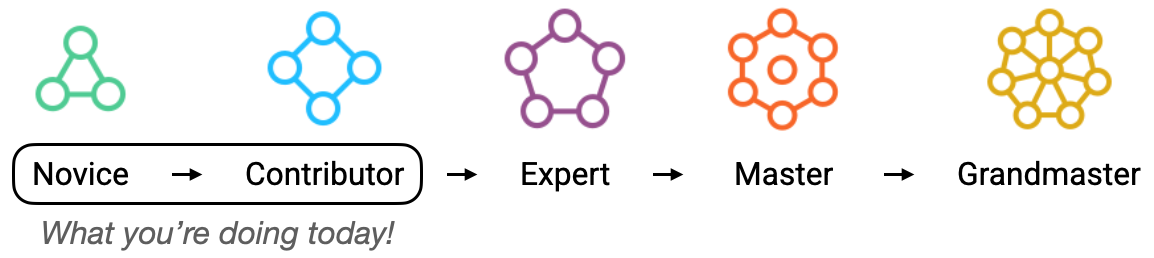

- [How to Progress](https://www.kaggle.com/progression)

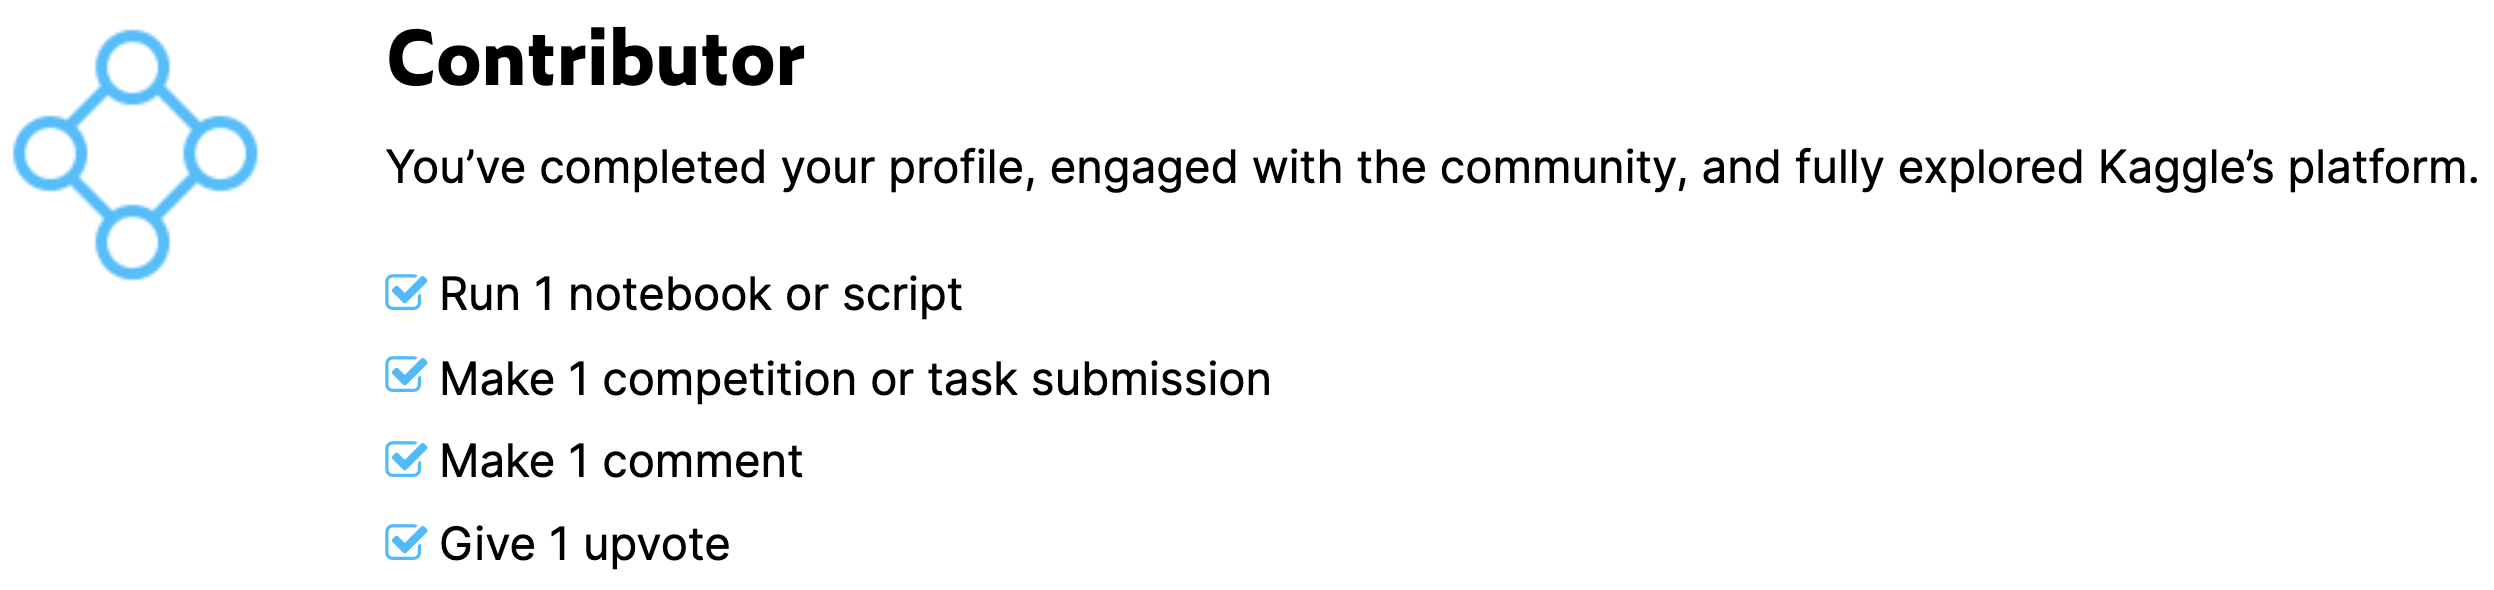

# Step 3: Submit to Titanic
- [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)

## Titanic Tutorial

### Part 1: Get started

- Join the competition! → Chek Challenge → Check Data

#### The data
- (1) train.csv
- (2) test.csv
- (3) gender_submission.csv : just like this file, your submission should have
  - a **"PassengerId"** column containing the IDs of each passenger from test.csv.
  - a **"Survived"** column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

### Part 2: Your coding environment

#### Kaggle Notebook
> - [Code tab](https://www.kaggle.com/c/titanic/kernels) → New Notebook

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

### Part 3: Your first submission
#### Explore a pattern
- gender_submission.csv assumes that all female passengers survived.
Is is resonable ?

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

- Since gender seems to be such a strong indicator of survival, It's not a bad guess. 
- But at the end of the day, this gender-based submission bases its predictions on only a single column.

#### random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

> - Save → Number beside Save Version → Open in Viewer → Output → Submit

# Step 4: Make a comment and Give an upvote
- at the End of some Competition or Tutorial Pages!

# ETC

- [Forum - Getting Started](https://www.kaggle.com/getting-started)